<a href="https://colab.research.google.com/github/showsunny/Apollonian_Gasket_Fractal/blob/main/Apollonian_Gasket_Fractal_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import cmath
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Circle():
    def __init__(self, bend, x, y):
        self.bend = bend
        self.radius = 1 / abs(self.bend)
        self.center = x + 1j*y

    def distance(self, other):
        return abs(self.center - other.center)

def show_circles(circles):
    fig, ax = plt.subplots()
    for circle in circles:
        c = plt.Circle((circle.center.real, circle.center.imag), circle.radius, edgecolor='b', facecolor='none')
        ax.add_patch(c)
    ax.set_aspect('equal', adjustable='box')

    min_x = min(circle.center.real - circle.radius for circle in circles) - 1
    max_x = max(circle.center.real + circle.radius for circle in circles) + 1
    min_y = min(circle.center.imag - circle.radius for circle in circles) - 1
    max_y = max(circle.center.imag + circle.radius for circle in circles) + 1

    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    #plt.grid(True)
    plt.show()

In [3]:
def descartes(c1, c2, c3):
    k1 = c1.bend
    k2 = c2.bend
    k3 = c3.bend

    sum = k1 + k2 + k3
    root = math.sqrt(abs(k1*k2 + k2*k3 + k3*k1))
    return [sum + 2*root, sum - 2*root]

def complex_descartes(c1, c2, c3, k4):
    k1 = c1.bend
    k2 = c2.bend
    k3 = c3.bend
    z1 = c1.center
    z2 = c2.center
    z3 = c3.center
    zk1 = k1 * z1
    zk2 = k2 * z2
    zk3 = k3 * z3

    sum = zk1 + zk2 + zk3
    root = cmath.sqrt(zk1*zk2 + zk2*zk3 + zk3*zk1)
    center1, center2, center3, center4 =  [ (sum + 2*root) / k4[0],
                                            (sum - 2*root) / k4[0],
                                            (sum + 2*root) / k4[1],
                                            (sum - 2*root) / k4[1], ]
    return [Circle(k4[0], center1.real, center1.imag),
            Circle(k4[0], center2.real, center2.imag),
            Circle(k4[1], center3.real, center3.imag),
            Circle(k4[1], center4.real, center4.imag)]

In [51]:
def validate(c4, c1, c2, c3, all_circles, r_min=10, epsilon=1e-8) -> bool:
    if c4.radius < r_min:
        return False
    for c in all_circles:
        d1 = c4.distance(c)
        d2 = abs(c.radius - c4.radius)
        if d1 < epsilon and d2 < epsilon:
            return False

    if not isTangent(c1, c4, epsilon=epsilon):
        return False
    if not isTangent(c2, c4, epsilon=epsilon):
        return False
    if not isTangent(c3, c4, epsilon=epsilon):
        return False
    return True
def isTangent(c1, c2, epsilon=1e-8) ->bool:
    d = c1.distance(c2)
    r1 = c1.radius
    r2 = c2.radius
    return abs(d-(r1+r2)) < epsilon or abs(d-abs(r1-r2)) < epsilon

def next_generation(queue, all_circles, r_min, epsilon):
    next_queue = []
    for triplet in queue:
        c1, c2, c3 = triplet
        k4 = descartes(c1, c2, c3)
        new_circles = complex_descartes(c1, c2, c3, k4)

        for new_circle in new_circles:
            if validate(new_circle, c1, c2, c3, all_circles,r_min=r_min, epsilon=epsilon):
                all_circles.append(new_circle)
                t1 = [c1, c2, new_circle]
                t2 = [c1, c3, new_circle]
                t3 = [c2, c3, new_circle]
                next_queue = next_queue + [t1, t2, t3]
    queue = next_queue
    return queue, all_circles


In [5]:
def create_vector_with_length(r):
    # 创建一个随机方向的单位向量
    direction = np.random.randn(2)
    unit_vector = direction / np.linalg.norm(direction)

    # 将单位向量的长度缩放为 r
    vector = r * unit_vector
    return vector



def scale_vector_to_length(vector, length):
    # 计算当前向量的模
    current_length = np.linalg.norm(vector)

    # 缩放因子
    scale_factor = length / current_length

    # 缩放后的向量
    scaled_vector = vector * scale_factor
    return scaled_vector



def rotate_vector(vector,arg):

    rotation_matrix = np.array([[np.cos(arg), -np.sin(arg)],
                                [np.sin(arg), np.cos(arg)]])

    # 使用旋转矩阵旋转向量
    rotated_vector = np.dot(rotation_matrix, vector)
    return rotated_vector

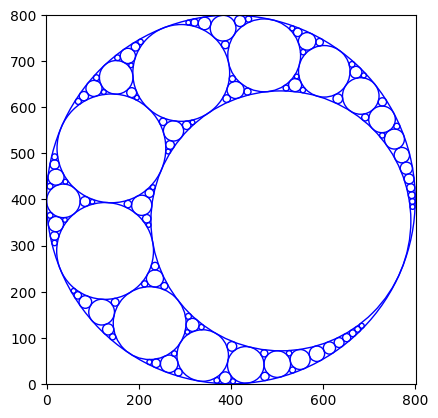

In [112]:
if __name__ == "__main__":
    width, height = 800, 800
    c1 = Circle(-1/(width/2), width/2, height/2)

    r2 = random.randint(100, c1.radius/2)
    vector = create_vector_with_length(c1.radius-r2)
    c2 = Circle(1/r2, c1.center.real + vector[0], c1.center.imag + vector[1])
    r3 = np.linalg.norm(vector)
    vector = rotate_vector(vector,np.pi)
    vector = scale_vector_to_length(vector,c1.radius-r3)
    c3 = Circle(1/r3, c1.center.real + vector[0], c1.center.imag + vector[1])
    all_circles = [c1, c2, c3]
    queue = [[c1, c2, c3]]
    r_min = 5
    epsilon =1e-4
    while queue:
        queue, all_circles = next_generation(queue, all_circles, r_min=r_min, epsilon=epsilon)
    show_circles(all_circles)